<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/11%EC%A3%BC%EC%B0%A8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>
<font size='6'><b>Convolutional Neural Networks (CNN)
</b></font><br><br>

<br>


<br>

# 1. Convolution
<br>

<br>

## 1.1. Convolution 정의
<br>
  For two continuous functions $f(t)$ (input signal) and $g(t)$ (impulse response, Kernel/Filter), the convolution is defined as:  
  <br>
  $$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$
  <br>

<br>

## 1.2. 1D Convolution
<br>


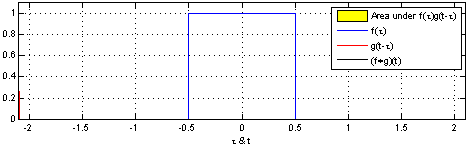

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0, 0, 0, 1, 1, 1, 0, 0])

y = np.convolve(x, x)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0])

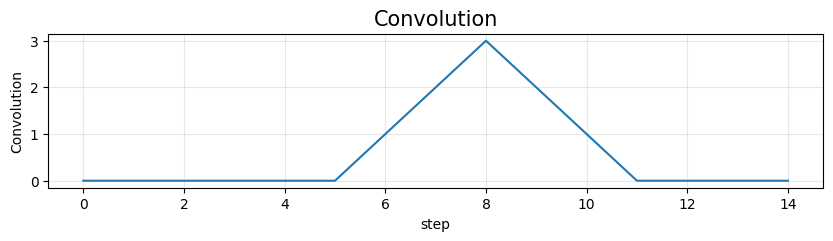

In [ ]:
z = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.figure(figsize = (10, 2))
plt.plot(z, y)
plt.xlabel('step')
plt.ylabel('Convolution')
plt.title('Convolution', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


<br>

## 1.3. 2D Convolution
<br>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread('/content/drive/MyDrive/Machine Learning실습/CNN/beach.jpeg')     # OpenCV
#image = cv2.imread('/content/drive/MyDrive/Machine Learning실습/CNN/coins.jpeg')
# Sobel 필터 정의
sobel_x = np.array([[ -1, 0, 1],
                     [ -2, 0, 2],
                     [ -1, 0, 1]])

sobel_y = np.array([[ 1, 2, 1],
                     [ 0, 0, 0],
                     [-1, -2, -1]])

# Convolution function
edge_x = cv2.filter2D(image, -1, sobel_x)
edge_y = cv2.filter2D(image, -1, sobel_y)

# Plotting
plt.figure(figsize=(30, 20))

plt.subplot(1, 3, 1)
plt.title('Original Image')
# plt.imshow(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Edge X')
# plt.imshow(edge_x, cmap='gray')
plt.imshow(cv2.cvtColor(edge_x,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edge Y')
plt.imshow(cv2.cvtColor(edge_y,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [ ]:
# Sobel Filter : Gaussian Blur
# sobel_x = 1/16*np.array([[ 1, 2, 1],
#                      [ 2, 4, 2],
#                      [ 1, 2, 1]])

# Sobel 필터 : Sharpen
sobel_x = np.array([[ 0, -1, 0],
                     [ -1, 5, -1],
                     [ 0, -1, 0]])

# Convolution function
edge_x = cv2.filter2D(image, -1, sobel_x)

# Plotting
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sobel Filter')
plt.imshow(cv2.cvtColor(edge_x,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [ ]:
# Averaging (filer 평균)

blur1 = cv2.blur(image,(10,10))

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Averaging')
plt.imshow(cv2.cvtColor(blur1,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
#  Gaussian Filter

blur2 = cv2.GaussianBlur(image,(15,15),0) # Kernal size (15,15)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Gaussian Blurred')
plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Bilateral filter

bilateral = cv2.bilateralFilter(image,20,75,75)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Bilateral filter')
plt.imshow(cv2.cvtColor(bilateral,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<br>

# 2. Convolutional Neural Networks (CNN) with single Kernel
<br>


<br>
<center>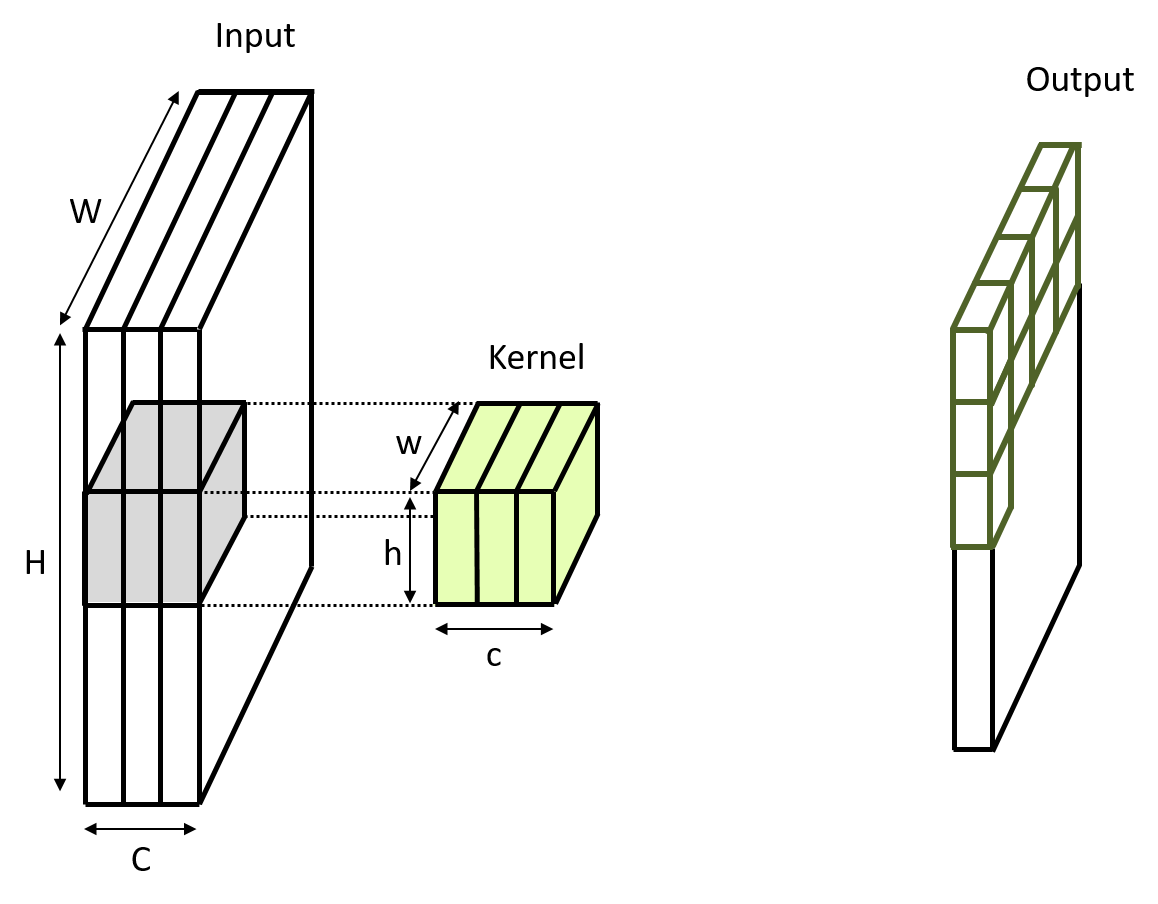</center>


<br>

## 2.1. Convolutian layer
<br>

<br>

### Image

<br>

In [5]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

(1, 3, 3, 1)


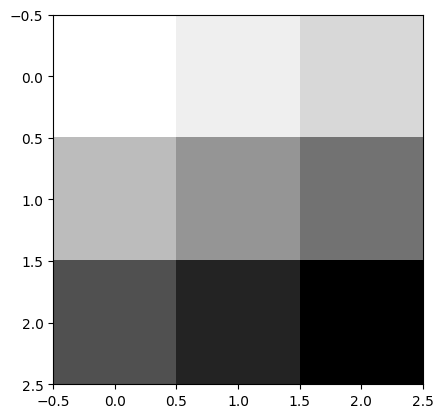

In [3]:
sess = tf.compat.v1.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

<br>

### No Padding
- padding : VALID
<br>

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


([], [])

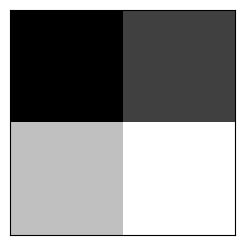

In [7]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.numpy()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

plt.xticks([])
plt.yticks([])

<br>

### With Padding
- padding : SAME
<br>

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


([], [])

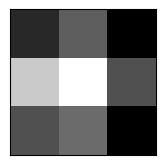

In [11]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.numpy()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

plt.xticks([])
plt.yticks([])

<br>

# 3. Convolutional Neural Networks (CNN) with multiple Kernel
<br>


<br>
<center>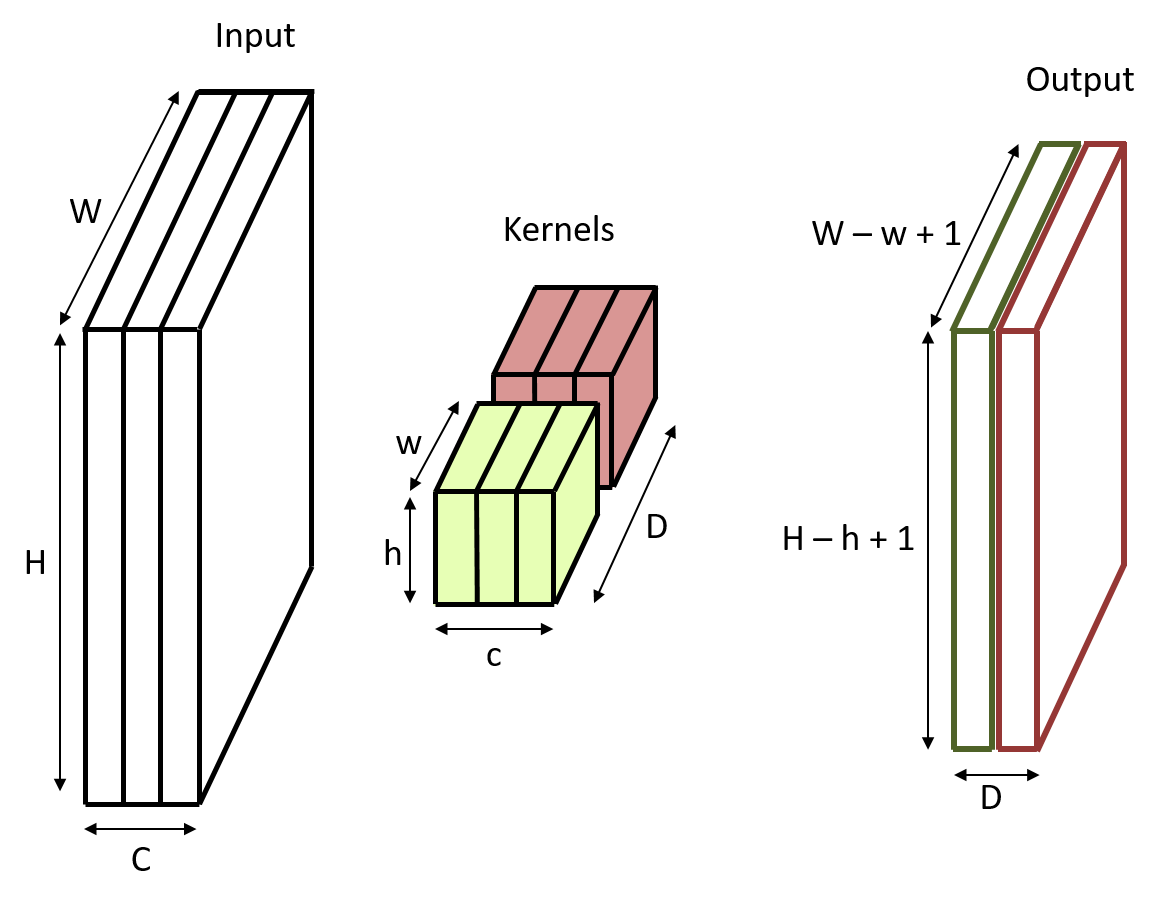</center>



<br>

## 3.1. Convolutian layer with 3 kernels
<br>

In [ ]:
# 3 Kernels
print("image.shape", image.shape)





<br>

## 3.2. Max Pooling
<br>
- Pooling size : $2\times2$ for example




<center>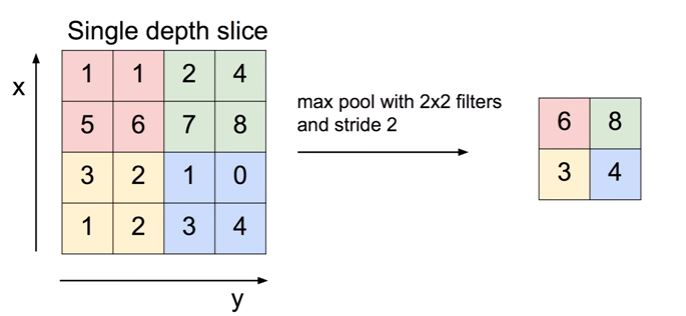</center>

In [ ]:
# Max pooling





In [ ]:
# Average pooling





In [ ]:
# Max pooling with zero padding(padding='SAME')







<br>

# 4. CNN for Classification

__Convolutional Layer Block__

- Convolution Operation:

- Nonlinear Activation Function:

- Pooling Operation:
<br>

__CNN for Classification__

- Feature Learning (Sequence of Convolutional Layer Blocks)
  - Multiple convolution + activation + pooling blocks

<br>

- Classification (Fully Connected Layers)
  - Flattening:
    - The output of the final convolutional layer (a 3D feature map) is flattened into a 1D vector.

  - Fully Connected Layers:

  - Softmax Output:
<br>




<br>
<center>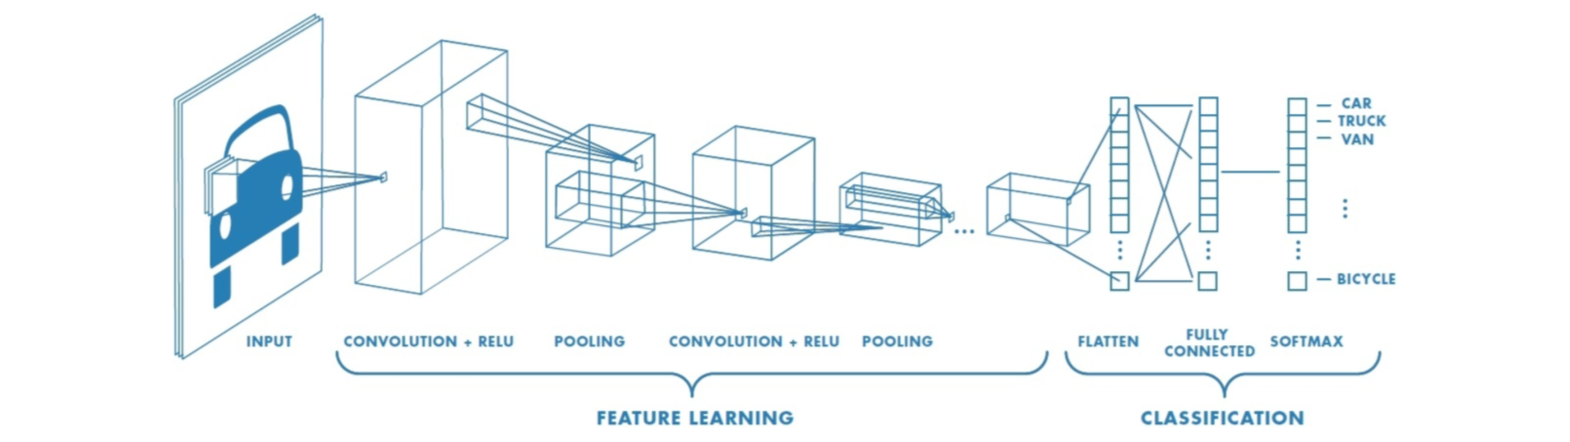</center>
<br>

<br><br>

# 5. Lab: CNN with TensorFlow (MNIST)

<br>


- MNIST without flattening
- To classify handwritten digits



<br>
<center>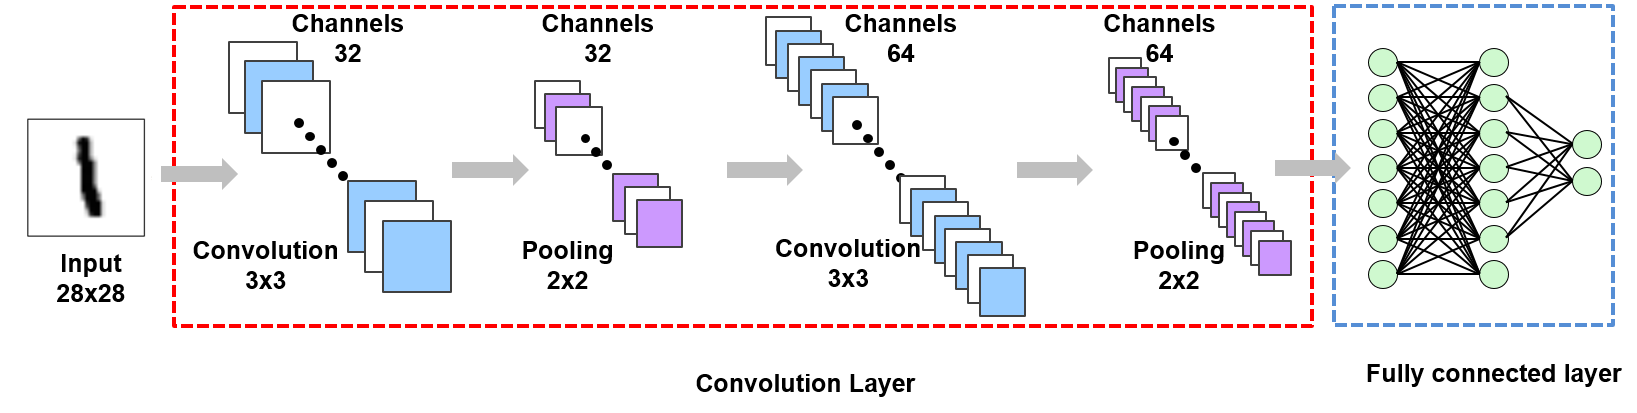</center>
<br>

<br>

## 5.1. Training

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [ ]:
# input layer
input_h =    # input height
input_w =    # input width
input_ch =    # input channel : Gray scale


# 1st convolution layer
k1_h =
k1_w =
k1_ch =
p1_h =
p1_w =
# (None, 14, 14, 32)

# 2nd convolution layer
k2_h =
k2_w =
k2_ch =
p2_h =
p2_w =
# (None, 7, 7, 64)

# Fully connected : flatten the features (7x7x64)
conv_result_size =
n_hidden = 100
n_output =

In [ ]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'hidden' : tf.Variable(tf.random.normal([], stddev = 0.1)),
    'output' : tf.Variable(tf.random.normal([], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)


In [ ]:
# [batch, height, width, channels]

def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d()
    conv1 = tf.nn.relu()
    maxp1 = tf.nn.max_pool()
#   maxp1 = tf.nn.max_pool(conv1, ksize=[1,p1_h,p1_w,1], strides=[1,p1_h,p1_w,1], padding='VALID')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d()
    conv2 = tf.nn.relu(tf.add())
    maxp2 = tf.nn.max_pool()

    maxp2_flatten = tf.reshape()

    # Fully connected
    hidden = tf.add(tf.matmul()
    hidden = tf.nn.relu()
    output = tf.add(tf.matmul()

    return output


In [ ]:
# Loss function

LR = 0.0001
pred = net()
loss = tf.nn.softmax_cross_entropy_with_logits()
loss = tf.reduce_mean()

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)


In [ ]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    # train_x, train_y = mnist.train.next_batch(n_batch)
    # train_x = np.reshape(train_x, (-1, 28, 28, 1))
    # # train_x = np.reshape(train_x, (n_batch, input_h, input_w, input_ch))
    # sess.run(optm, feed_dict={x:train_x, y:train_y})

    # Get a random batch of training data
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    batch_x = np.reshape(batch_x, (-1, 28, 28, 1))
    # batch_x = np.reshape(batch_x, (n_batch, input_h, input_w, input_ch))
    # Convert labels to one-hot encoding if necessary
    batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=10)  # Adjust num_classes if needed

    sess.run(optm, feed_dict={x:batch_x, y:batch_y})

    if epoch % n_prt == 0:
        # test_x, test_y = mnist.test.next_batch(n_batch)
        # test_x = test_x.reshape((n_batch, input_h, input_w, input_ch))
        # c1 = sess.run(loss, feed_dict={x:train_x, y:train_y})
        # c2 = sess.run(loss, feed_dict={x:test_x, y:test_y})

        # Get a random batch of test data
        test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_batch_indices]
        test_batch_y = test_y[test_batch_indices]

        test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))
        # Convert labels to one-hot encoding if necessary
        test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed
        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

<br>

## 5.2. Testing or Evaluating

In [ ]:
# Evaluation
# Get a random batch of test data
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


In [ ]:
# Get a random batch of test data
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed
# Convert labels to one-hot encoding if necessary
test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x.reshape(-1, 28, 28, 1)})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

# 실습(Debugging)

In [ ]:
# Optimization

n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    train_x = np.reshape(train_x, (-1, 28, 28, 1))
    # train_x = np.reshape(train_x, (n_batch, input_h, input_w, input_ch))
    sess.run(optm, feed_dict={x:train_x, y:train_y})

    if epoch % n_prt == 0:
        test_x, test_y = mnist.test.next_batch(n_batch)
        test_x = test_x.reshape((n_batch, input_h, input_w, input_ch))
        c1 = sess.run(loss, feed_dict={x:train_x, y:train_y})
        c2 = sess.run(loss, feed_dict={x:test_x, y:test_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()